In [1]:
import numpy as np
import argparse
import time
import cv2
import os

In [2]:
LABELS = open("wheat.txt").read().strip().split("\n")
print(LABELS)

['wheat']


In [3]:
#Load model
net = cv2.dnn.readNetFromDarknet("models/wheat_v3.cfg", "models/wheat_v3_best.weights")

In [4]:
TEST_IMAGE_PATH = [ os.path.join("test", '{}'.format(i)) for i in os.listdir("test")]
print(TEST_IMAGE_PATH)

['test/cb8d261a3.jpg', 'test/796707dd7.jpg', 'test/53f253011.jpg', 'test/348a992bb.jpg', 'test/aac893a91.jpg', 'test/51b3e36ab.jpg', 'test/f5a1f0358.jpg', 'test/cc3532ff6.jpg', 'test/51f1be19e.jpg', 'test/2fd875eaa.jpg']


In [5]:
from matplotlib import pyplot as plt

[INFO] YOLO took 0.286981 seconds


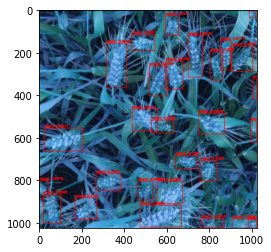

[INFO] YOLO took 0.076065 seconds


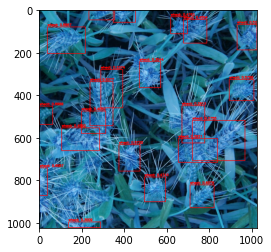

[INFO] YOLO took 0.066466 seconds


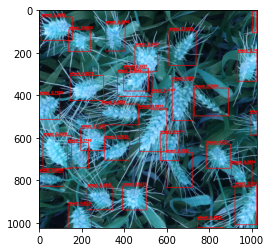

[INFO] YOLO took 0.046971 seconds


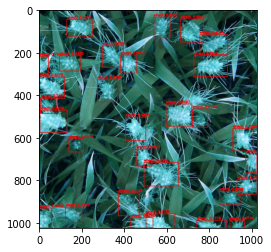

[INFO] YOLO took 0.067677 seconds


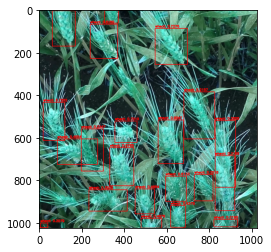

[INFO] YOLO took 0.063970 seconds


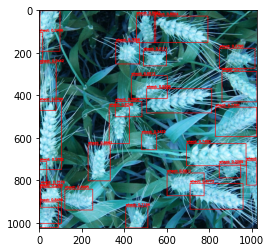

[INFO] YOLO took 0.058743 seconds


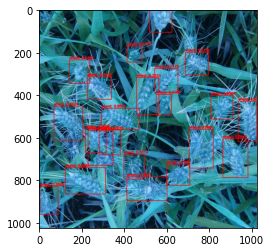

[INFO] YOLO took 0.068735 seconds


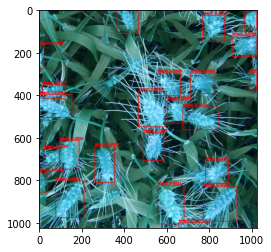

[INFO] YOLO took 0.060683 seconds


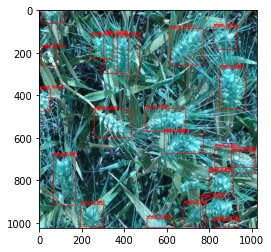

[INFO] YOLO took 0.061307 seconds


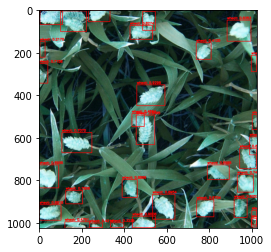

In [6]:
for image_path in TEST_IMAGE_PATH:
    image = cv2.imread(image_path)
    (H, W) = image.shape[:2]

    # determine only the *output* layer names that we need from YOLO
    ln = net.getLayerNames()
    ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]

    # construct a blob from the input image and then perform a forward
    # pass of the YOLO object detector, giving us our bounding boxes and
    # associated probabilities
    blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),
        swapRB=True, crop=False)
    net.setInput(blob)
    start = time.time()
    layerOutputs = net.forward(ln)
    end = time.time()

    # show timing information on YOLO
    print("[INFO] YOLO took {:.6f} seconds".format(end - start))

    # initialize our lists of detected bounding boxes, confidences, and
    # class IDs, respectively
    boxes = []
    confidences = []
    classIDs = []
     # loop over each of the layer outputs
    for output in layerOutputs:
        # loop over each of the detections
        for detection in output:
            # extract the class ID and confidence (i.e., probability) of
            # the current object detection
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]

            # filter out weak predictions by ensuring the detected
            # probability is greater than the minimum probability
            if confidence > 0:
                # scale the bounding box coordinates back relative to the
                # size of the image, keeping in mind that YOLO actually
                # returns the center (x, y)-coordinates of the bounding
                # box followed by the boxes' width and height
                box = detection[0:4] * np.array([W, H, W, H])
                (centerX, centerY, width, height) = box.astype("int")

                # use the center (x, y)-coordinates to derive the top and
                # and left corner of the bounding box
                x = int(centerX - (width / 2))
                y = int(centerY - (height / 2))

                # update our list of bounding box coordinates, confidences,
                # and class IDs
                boxes.append([x, y, int(width), int(height)])
                confidences.append(float(confidence))
                classIDs.append(classID)

    # apply non-maxima suppression to suppress weak, overlapping bounding
    # boxes
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0,
        0.5)
    
    res = []
    # ensure at least one detection exists
    if len(idxs) > 0:
        # loop over the indexes we are keeping
        for i in idxs.flatten():
            # extract the bounding box coordinates
            (x, y) = (boxes[i][0], boxes[i][1])
            (w, h) = (boxes[i][2], boxes[i][3])

            # draw a bounding box rectangle and label on the image
            
        
            cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
            box_data = []
            box_data.append("wheat")
            box_data.append(confidences[i])
            box_data.append(x)
            box_data.append(y)
            box_data.append(x+w)
            box_data.append(y+h)
            res.append(box_data)
            text = "{}: {:.4f}".format("wheat", confidences[i])
            cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
                0.5, (255, 0, 0) , 2)

    # show the output image
    #cv2.imshow("Image", image)
    #cv2.waitKey(0)
    plt.imshow(image)
    plt.show()
    